# IMPORTING AND CREATING A SINGLE DF 

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
files_path = ['top_100most_popular_country_songs_df.csv',
              'top_100most_popular_hippop_songs_df.csv',
              'top_100most_popular_rock_songs_df.csv',
             'top_100most_popular_2000s_songs_df.csv',
'top_100most_popular_BLUES_CLASSIC_songs_df.csv',
'top_100most_popular_BRITPOP_songs_df.csv',
'top_100most_popular_DISCO_songs_df.csv',
'top_100most_popular_GOSPEL_songs_df.csv',
'top_100most_popular_GRIME_songs_df.csv',
'top_100most_popular_INDIE_FOLK_songs_df.csv',
'top_100most_popular_JAPANESE_songs_df.csv',
'top_100most_popular_JAZZ_songs_df.csv',
'top_100most_popular_LATIN_AMR_songs_df.csv',
'top_100most_popular_PSYCHADELIC_songs_df.csv',
'top_100most_popular_techno_songs_df.csv',
'top_100best_reggaeton_songs_df.csv',           
]


In [4]:
spotify_df = pd.DataFrame()

In [5]:
for file_path in files_path:
    df = pd.read_csv(file_path)
    spotify_df = pd.concat([spotify_df, df], ignore_index=True)

In [6]:
print (spotify_df)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.687   0.745    6    -4.432     1       0.0379         0.178   
1            0.392   0.370    9   -10.888     1       0.0298         0.205   
2            0.617   0.741    2    -3.970     1       0.0311         0.131   
3            0.607   0.536   10    -7.306     1       0.0305         0.386   
4            0.677   0.556    9    -6.544     1       0.0306         0.263   
...            ...     ...  ...       ...   ...          ...           ...   
1468         0.808   0.697   10    -5.899     1       0.2410         0.041   
1469         0.826   0.704    9    -7.527     1       0.1170         0.189   
1470         0.815   0.856    1    -3.825     0       0.1220         0.400   
1471         0.736   0.848    5    -5.242     1       0.1020         0.278   
1472         0.852   0.797    0    -6.543     1       0.0614         0.322   

      instrumentalness  liveness  valence    tempo            t

# Getting the first few rows

In [7]:
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.687,0.745,6,-4.432,1,0.0379,0.178,0.000016,0.1110,0.435,129.966,audio_features,1GEBsLDvJGw7kviySRI6GX,spotify:track:1GEBsLDvJGw7kviySRI6GX,https://api.spotify.com/v1/tracks/1GEBsLDvJGw7...,https://api.spotify.com/v1/audio-analysis/1GEB...,232120,4
1,0.392,0.370,9,-10.888,1,0.0298,0.205,0.009600,0.0821,0.512,48.718,audio_features,3fqwjXwUGN6vbzIwvyFMhx,spotify:track:3fqwjXwUGN6vbzIwvyFMhx,https://api.spotify.com/v1/tracks/3fqwjXwUGN6v...,https://api.spotify.com/v1/audio-analysis/3fqw...,293293,4
2,0.617,0.741,2,-3.970,1,0.0311,0.131,0.000000,0.0772,0.306,118.984,audio_features,1D4PL9B8gOg78jiHg3FvBb,spotify:track:1D4PL9B8gOg78jiHg3FvBb,https://api.spotify.com/v1/tracks/1D4PL9B8gOg7...,https://api.spotify.com/v1/audio-analysis/1D4P...,236267,4
3,0.607,0.536,10,-7.306,1,0.0305,0.386,0.000000,0.1020,0.434,147.986,audio_features,10M2Ex445zw585Ducldzkw,spotify:track:10M2Ex445zw585Ducldzkw,https://api.spotify.com/v1/tracks/10M2Ex445zw5...,https://api.spotify.com/v1/audio-analysis/10M2...,224853,4
4,0.677,0.556,9,-6.544,1,0.0306,0.263,0.000000,0.1050,0.521,80.006,audio_features,1HXy5I3HTWq8OvxCn0z7G7,spotify:track:1HXy5I3HTWq8OvxCn0z7G7,https://api.spotify.com/v1/tracks/1HXy5I3HTWq8...,https://api.spotify.com/v1/audio-analysis/1HXy...,179507,4


# APPLYING FEATURE SCALING 

In [8]:
features = spotify_df.select_dtypes(include='number')

In [9]:
scaler = StandardScaler()

In [10]:
scaled_features = scaler.fit_transform(features)

In [11]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [12]:
scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.520319,0.403121,0.155294,0.816787,0.694184,-0.506695,-0.290501,-0.349655,-0.502811,-0.387373,0.276160,-0.128405,0.163282
1,-1.201826,-1.294036,0.975181,-0.767962,0.694184,-0.592775,-0.197642,-0.299393,-0.678863,-0.072418,-2.526637,0.528527,0.163282
2,0.111675,0.385018,-0.937888,0.930194,0.694184,-0.578960,-0.452145,-0.349738,-0.708713,-0.915024,-0.102684,-0.083871,0.163282
3,0.053297,-0.542761,1.248476,0.111309,0.694184,-0.585336,0.424860,-0.349738,-0.557637,-0.391463,0.897792,-0.206445,0.163282
4,0.461942,-0.452246,0.975181,0.298356,0.694184,-0.584274,0.001834,-0.349738,-0.539361,-0.035605,-1.447301,-0.693411,0.163282


In [13]:
spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1.473000e+03,1473.000000
mean,0.597870,0.655927,5.431772,-7.759452,0.674813,0.085579,0.262467,0.066690,0.193539,0.529705,121.960631,2.440770e+05,3.947726
std,0.171356,0.221033,3.660285,4.075215,0.468604,0.094130,0.290861,0.190749,0.164212,0.244563,28.998030,9.315092e+04,0.320257
min,0.122000,0.007560,0.000000,-26.440000,0.000000,0.022700,0.000002,0.000000,0.019900,0.033400,48.718000,4.022700e+04,1.000000
25%,0.475000,0.512000,2.000000,-9.838000,0.000000,0.033700,0.029200,0.000000,0.094100,0.329000,97.911000,1.936270e+05,4.000000
50%,0.599000,0.696000,6.000000,-6.652000,1.000000,0.046400,0.140000,0.000018,0.123000,0.533000,121.573000,2.277630e+05,4.000000
75%,0.730000,0.836000,9.000000,-4.953000,1.000000,0.085800,0.415000,0.003550,0.248000,0.733000,140.791000,2.711070e+05,4.000000
max,0.979000,0.998000,11.000000,0.691000,1.000000,0.922000,0.995000,0.985000,1.000000,0.981000,214.025000,1.618693e+06,5.000000


In [14]:
scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03,1.473000e+03
mean,2.508365e-16,-9.647559e-18,-3.135457e-17,2.894268e-17,9.768154e-17,2.894268e-17,-3.859024e-17,1.929512e-17,-2.218939e-16,2.363652e-16,-6.557325e-16,-4.823780e-17,-2.966624e-16
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.778026e+00,-2.934349e+00,-1.484479e+00,-4.585499e+00,-1.440540e+00,-6.682286e-01,-9.026764e-01,-3.497382e-01,-1.057771e+00,-2.030046e+00,-2.526637e+00,-2.189127e+00,-9.207381e+00
25%,-7.172899e-01,-6.513790e-01,-9.378880e-01,-5.102195e-01,-1.440540e+00,-5.513293e-01,-8.022589e-01,-3.497382e-01,-6.057617e-01,-8.209468e-01,-8.296356e-01,-5.417778e-01,1.632815e-01
50%,6.594749e-03,1.813592e-01,1.552942e-01,2.718454e-01,6.941839e-01,-4.163637e-01,-4.211918e-01,-3.496438e-01,-4.297097e-01,1.347890e-02,-1.337202e-02,-1.751943e-01,1.632815e-01
75%,7.713439e-01,8.149645e-01,9.751809e-01,6.888975e-01,6.941839e-01,2.348375e-03,5.245975e-01,-3.311210e-01,3.317609e-01,8.315433e-01,6.495877e-01,2.902731e-01,1.632815e-01
max,2.224951e+00,1.548136e+00,1.521772e+00,2.074326e+00,6.941839e-01,8.888822e+00,2.519353e+00,4.815867e+00,4.912768e+00,1.845943e+00,3.175927e+00,1.476188e+01,3.286836e+00


# Clustering the SPOTIFY_DFs with K-Means¶

In [15]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(scaled_df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=1234)

In [16]:
labels = kmeans.labels_
labels

array([1, 3, 5, ..., 2, 1, 1])

In [17]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [22]:
# # assign a cluster to each example
# labels = kmeans.predict(scaled_df)
# # retrieve unique clusters
# clusters = np.unique(labels)
# # create scatter plot for samples from each cluster
# for cluster in clusters:
#     # get row indexes for samples with this cluster
#     row_ix = np.where(labels == cluster)
#     # create scatter of these samples
#     pltplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
#     plt.plot(scaled_df.iloc[:, 0])
    
# plt.show()

Now that we have our model, let's get the clusters and how many observations each cluster has.

In [18]:
clusters = kmeans.predict(scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     75
1    342
2    313
3    263
4    150
5    330
Name: count, dtype: int64

In [19]:
clusters

array([1, 3, 5, ..., 2, 1, 1])

In [20]:
with open('kmeans_model.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [21]:
scaled_df["cluster"] = clusters
scaled_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.520319,0.403121,0.155294,0.816787,0.694184,-0.506695,-0.290501,-0.349655,-0.502811,-0.387373,0.276160,-0.128405,0.163282,1
1,-1.201826,-1.294036,0.975181,-0.767962,0.694184,-0.592775,-0.197642,-0.299393,-0.678863,-0.072418,-2.526637,0.528527,0.163282,3
2,0.111675,0.385018,-0.937888,0.930194,0.694184,-0.578960,-0.452145,-0.349738,-0.708713,-0.915024,-0.102684,-0.083871,0.163282,5
3,0.053297,-0.542761,1.248476,0.111309,0.694184,-0.585336,0.424860,-0.349738,-0.557637,-0.391463,0.897792,-0.206445,0.163282,5
4,0.461942,-0.452246,0.975181,0.298356,0.694184,-0.584274,0.001834,-0.349738,-0.539361,-0.035605,-1.447301,-0.693411,0.163282,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1.226691,0.185885,1.248476,0.456684,0.694184,1.651691,-0.761676,-0.349738,-0.846386,0.099376,-0.927986,-0.129479,0.163282,4
1469,1.331771,0.217565,0.975181,0.057060,0.694184,0.333917,-0.252669,-0.349486,-0.803135,0.864266,-0.964104,-0.419644,0.163282,1
1470,1.267555,0.905479,-1.211184,0.965787,-1.440540,0.387053,0.473009,-0.349301,0.307394,1.400098,-1.033719,-0.992383,0.163282,2
1471,0.806371,0.869273,-0.118001,0.617957,0.694184,0.174509,0.053422,-0.349738,-0.658760,0.655659,-0.931470,-0.640146,0.163282,1


In [22]:
scaled_df[scaled_df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
221,-0.03427,0.502688,0.975181,1.220338,-1.44054,-0.622532,-0.895462,-0.341085,-0.405343,-0.825037,-0.878897,0.919853,0.163282,2


# Playing with the parameters

In [23]:
kmeans.inertia_

12329.134049730143

In [24]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(scaled_df)
print(kmeans2.inertia_)

15986.452862282604


# Choosing K

Training a K-Means model with 2 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 11 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 13 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 15 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 16 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 17 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 18 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 20 clusters! 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

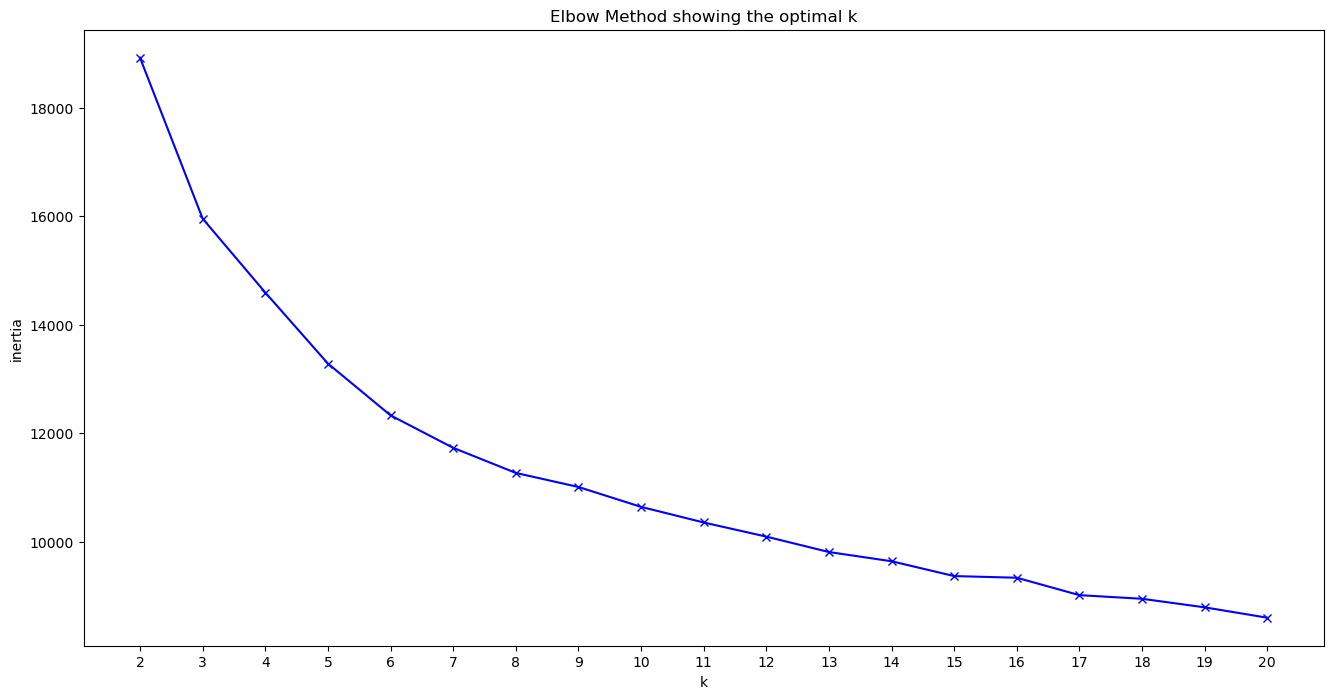

In [25]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Silhouette

In [26]:
import pickle

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

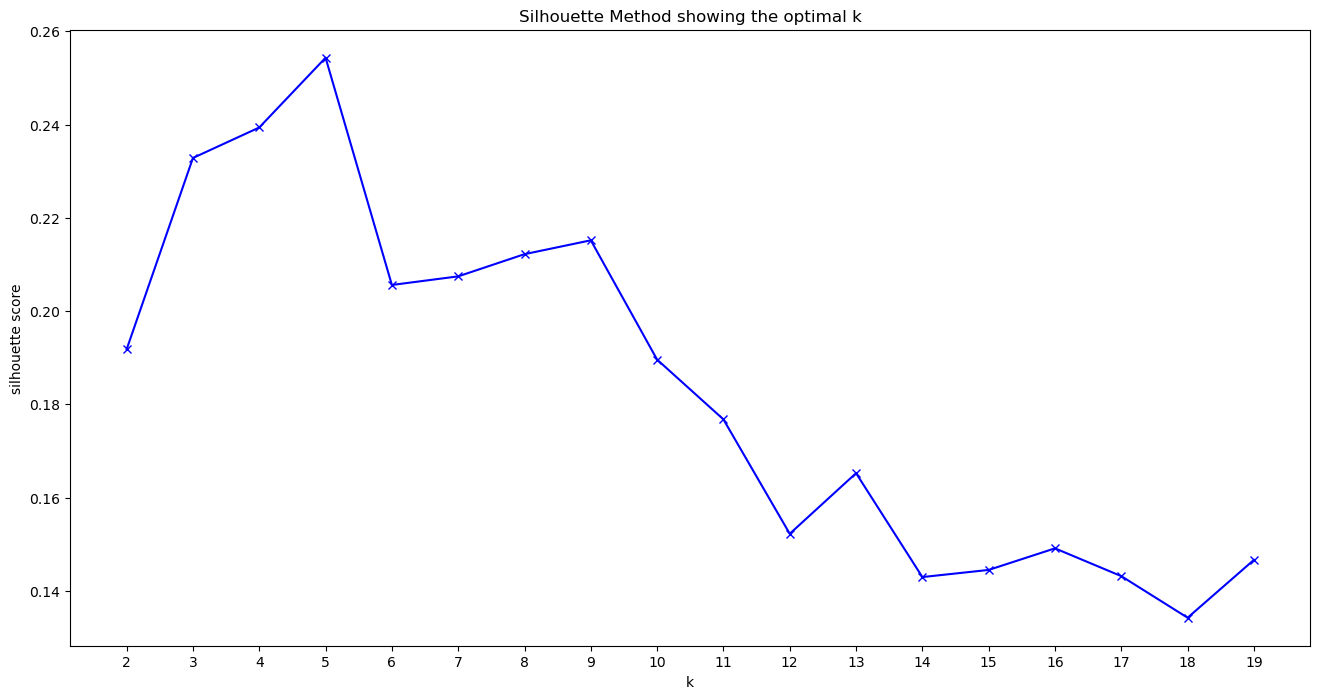

In [27]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init=10)
    kmeans.fit(scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [28]:
final_df = pd.concat([scaled_df, spotify_df['id']], axis=1)
final_df.to_csv('final_df.csv', index=False)

The greater the Silhouette, the greater the separation between the clusters. In other words, the clusters will be more defined.

# advanced (optional)

In [75]:
#conda install -c districtdatalabs yellowbrick

Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [71]:
#from yellowbrick.cluster import SilhouetteVisualizer
#model = KMeans(6, random_state=42)
#visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#visualizer.fit(X_#scaled_df)        # Fit the data to the visualizer
#visualizer.show()  

In [ ]:
#visualizer.show()

# Saving with pickle¶

In [70]:
def save(model, filename = "filename.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(model, f)

In [71]:
save(kmeans,'kmeans_model.pickle')

In [72]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [73]:
save(scaler,"scaler.pickle")

In [74]:
scaler= load(filename="Model/scaler.pickle")

File not found!


In [75]:
kmeans_model = load(filename="Model/kmeans_4.pickle")

File not found!


In [76]:
kmeans_model

In [77]:
scaler2 = load("Model/scaler.pickle")

File not found!


This code performs k-means clustering on your data for different values of k (number of clusters) within the range of 2 to 19. For each k, it fits a k-means model, computes the silhouette score, and saves the trained k-means model using pickle. Here's a breakdown:

K = range(2, 20): This line creates a range of values from 2 to 19 (inclusive) and assigns it to the variable K. This will be used as the range for the number of clusters in k-means.

silhouette = []: This initializes an empty list named silhouette to store the silhouette scores for different values of k.

for k in K:: This is a loop that iterates over each value of k in the range defined by K.

kmeans = KMeans(n_clusters=k, random_state=1234, n_init='auto'): This line creates a k-means clustering model with k clusters. random_state ensures reproducibility, and n_init='auto' automatically determines the number of times the algorithm will be run with different centroid seeds. This is done to increase the chances of finding a better clustering solution.

kmeans.fit(scaled_df): This fits the k-means model to the scaled data (scaled_df).

filename = "kmeans_" + str(k) + ".pickle": This line generates a filename based on the value of k and appends it with ".pickle". For example, if k is 2, the filename will be "kmeans_2.pickle".

with open(filename, "wb") as f:: This opens a file with the generated filename in write-binary mode.

pickle.dump(kmeans, f): This saves the trained k-means model to the file using pickle.

silhouette.append(silhouette_score(scaled_df, kmeans.predict(scaled_df))): This computes the silhouette score for the current k-means model and appends it to the silhouette list. The silhouette score is a metric that measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

The loop continues for each value of k in the specified range, and after the loop, you should have a list of silhouette scores for each k, and each trained k-means model saved in a corresponding pickle file.